<a href="https://colab.research.google.com/github/31ldts/IFP-organizer/blob/main/ifp_organizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## API's install and import

In [ ]:
!pip install mplcursors --upgrade
!pip install -i https://test.pypi.org/simple/ ifp-organizer

Looking in indexes: https://test.pypi.org/simple/
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.5 MB/s eta 0:00:00


In [ ]:
from ifp_organizer import AnalyzeInteractions
analyzer = AnalyzeInteractions()

## Library Overview

This library is designed to process and visualize molecular interaction data. It includes two main classes:

- **InteractionData**: This class stores all the extracted information from the input files. In it, you will find the interaction matrix along with various metadata that allow for correct interpretation. When you save an `InteractionData` object, an Excel file (`.xlsx`) is generated with two sheets:
  - **Sheet 1 (Interaction Matrix):** Contains the numerical matrix representing the interactions between residues and ligands.
  - **Sheet 2 (Metadata):** Contains essential details such as:
    - **ID:** The identifier number for each interaction, which is used to reference interactions in the matrix.
    - **Interactions:** Names of the interactions.
    - **Color:** The hexadecimal color assigned to each interaction.
    - **Ligand:** Indicates whether the ligand atom code is represented.
    - **Mode:** The file type mode, either `arpeggio` or `ichem`.
    - **Protein:** Indicates whether the protein atom code is represented.
    - **Subunit:** Specifies if subunits are differentiating residues, and includes a list of registered subunits available in the dataset.

- **AnalyzeInteractions**: This manager class contains a set of methods that allow you to create and interact with `InteractionData` objects. Through these methods, you can analyze and visualize the interaction data using a variety of filters, sorting functions, and graphical outputs.

---

**Supported File Types and Interaction Schemes**

The library supports two established classification schemes for molecular interactions, processing two types of input files:

- **IChem (`.txt` files)**
- **Arpeggio (`.json` files)**

Each file type follows its own set of interaction labels:

| **ID** | **IChem Interaction Labels** | **Arpeggio Interaction Labels** |
|--------|------------------------------|---------------------------------|
| 1      | Aromatic_Edge/Face           | AMIDEAMIDE                      |
| 2      | Aromatic_Face/Face           | AMIDERING                       |
| 3      | Aromatic_Edge/Face           | aromatic                        |
| 4      | HBond_LIG                    | CARBONPI                        |
| 5      | HBond_PROT                   | carbonyl                        |
| 6      | Ionic_LIG                    | CATIONPI                        |
| 7      | Ionic_PROT                   | covalent                        |
| 8      | Metal Acceptor               | DONORPI                         |
| 9      | Pi/Cation                    | HALOGENPI                       |
| 10     | Other_Interactions           | hbond                           |
| 11     |                              | hydrophobic                     |
| 12     |                              | ionic                           |
| 13     |                              | metal                           |
| 14     |                              | METSULPHURPI                    |
| 15     |                              | plane-plane                     |
| 16     |                              | polar                           |
| 17     |                              | weak_hbond                      |
| 18     |                              | weak_polar                      |
| 19     |                              | xbond                           |

The table above shows the **default IDs and interaction labels** supported by the library. However, these may change if a custom interaction scheme is configured or if additional labeling rules are applied.

To retrieve the exact list of interactions present in your processed dataset, you can use the method:
```python
get_interactions(interaction_data: InteractionData) -> dict[int, str]  
```

This returns a dictionary with the detected interaction typesand their IDs.

---

**Example of Interaction Data Representation**

An example of an entry in the interaction matrix is as follows:

- For residue **MET XX** and ligand **YYY**, the recorded interactions might be:  
  **4 |CE-C3(A), CE-C3(B)|; 5 |OG-N2(B)|**  
  Here, the number (e.g., 4, 5) indicates the interaction ID and the labels following it show the interaction details between the protein and the ligand atoms.

- If the `subunit` parameter is set to `True`, the interactions are split by subunit. For example:  
  - For residue **MET XX-A**: **4 |CE-C3|**  
  - For residue **MET XX-B**: **4 |CE-C3|; 5 |OG-N2|**  

In this case, the interactions are denoted as **protein atom - ligand atom** interactions, with the residue’s subunit explicitly identified.

## Change Working Directory

Changes the working directory used for either input or output operations within the library.

```python
change_directory(path: str, mode: str) -> None
```

**Args**
- `path` (`str`): Name of the subdirectory to switch to.
- `mode` (`str`): Specifies whether to update the input or output directory. Accepted values are:
  - `'input'`: Sets the directory for reading input files.
  - `'output'`: Sets the directory for saving output files.

> 💡 **Tip:** To avoid typos and improve code readability, you can use the predefined constants provided by the library:  
> - `analyzer.INPUT` instead of `'input'`  
> - `analyzer.OUTPUT` instead of `'output'`  

---

**Why change the working directory?**

Setting custom input/output directories is useful for several reasons:

- **Simplifies file paths**: You won’t need to specify full absolute paths every time you load or save a file.
- **Improves organization**: Helps separate raw input data from generated results, making the workflow more maintainable.
- **Enhances reproducibility**: A clear and consistent folder structure makes it easier to share or revisit your analysis later.

---

**Example**: Input directory layout for Arpeggio data

A typical input directory structure might look like this:

```
input_directory/
│── ifp_interactions/     # Directory containing interaction fingerprint (IFP) JSON files
│   ├── file1.json
│   ├── file2.json
│   ├── file3.json
│── activities.csv        # CSV file with compound activity data
│── subpockets.csv        # CSV with subpocket classification and related metadata
```

In [ ]:
analyzer.change_directory(path="/content/drive/MyDrive/Universidad/TFGB/LibraryData/output", mode=analyzer.OUTPUT)
analyzer.change_directory(path="/content/drive/MyDrive/Universidad/TFGB/LibraryData/input", mode=analyzer.INPUT)

## Custom Settings

Configures interaction settings, including labels, colors, and visualization parameters.

```python
def set_config(self, interactions: list[str] = None, plot_max_cols: int = None, plot_colors: list[str] = None, reset: bool = False, mode: str = None, heat_max_cols: int = None, heat_colors: str = None, interaction_data: InteractionData = None ) -> None
```

**Args**
- `interactions` (`list[str]`, optional): List of interaction labels.
- `plot_max_cols` (`int`, optional): Maximum number of columns for plot visualization.
- `plot_colors` (`list[str]`, optional): List of colors in hexadecimal format.
- `reset` (`bool`, optional): If `True`, resets configurations to default values.
- `mode` (`str`, optional): Determines preset configurations for different analysis modes (`'ichem'` or `'arpeggio'`).
- `heat_max_cols` (`int`, optional): Maximum number of columns for heatmap visualization.
- `heat_colors` (`str`, optional): Color scheme for heatmaps.
- `interaction_data` (`InteractionData`, optional): Object containing interaction settings to be applied.




## Analyze Files

Analyzes interaction data files in the specified directory and processes them according to the selected mode.

```python
analyze_files(directory: str, mode: str, activity_file: str = None, protein: bool = True, ligand: bool = True, subunit: bool = False, template_file: str = None, save: str = None) -> InteractionData
```

**Args**
- `directory` (`str`): Path to the directory containing the interaction data files.
- `mode` (`str`): Defines how the data should be processed. Supported modes are:
  - `'ichem'`: For parsing IChem-format interaction files.
  - `'arpeggio'`: For parsing Arpeggio-format interaction files.

- `activity_file` (`str`, optional): Path to a CSV file containing compound activity data. If provided, the data will be used to annotate the interaction matrix.
- `protein` (`bool`, optional): Whether to include protein atoms in the analysis. Defaults to `True`.
- `ligand` (`bool`, optional): Whether to include ligand atoms in the analysis. Defaults to `True`.
- `subunit` (`bool`, optional): Whether to differentiate between protein subunits (e.g., chains). Defaults to `False`.
- `template_file` (`str`, optional): Path to a JSON file containing a template for the interaction data.
- `save` (`str`, optional): Path where the processed interaction matrix will be saved. If not specified, the result is returned without being saved to disk.

> 💡 **Tip:** To avoid typos and improve code readability, you can use the predefined constants provided by the library:  
> - `analyzer.ICHEM` instead of `'ichem'`  
> - `analyzer.ARPEGGIO` instead of `'arpeggio'`
---

**Activity file format** (`activities.csv`)

If provided, the activity file should be a CSV with the following columns:

- `pdb_id`: PDB identifier of the protein-ligand complex.  
- `pIC50`: Negative log of the IC50 value, used to represent binding affinity (higher values indicate stronger binding).

Example:

| pdb_id | pIC50 |
|--------|-------|
| 7gnf   | 6.66  |
| 7gne   | 5.42  |
| 7gga   | 6.54  |
| 7gg2   | 5.76  |
| 7gjm   | 6.80  |
| 7gej   | 5.02  |
| 7gb0   | 4.00  |
| 7gkt   | 6.05  |
| 7giz   | 6.44  |
| 7gjw   | 5.42  |

> 📝 **Note:** Missing Activity Values
>
> If a complex is not found in the activity file, it will be assigned a default value of **0.0**. This does not indicate zero activity, but rather that the activity is **unknown**.
>
> To filter out complexes with unknown activities and only retain those with measured values, you can sort by activity while setting a minimum threshold of 0.1. This ensures that only entries with recorded activity data are included in the analysis.

In [ ]:
data = analyzer.analyze_files(directory="386_arpeggio", mode=analyzer.ARPEGGIO, activity_file="386_Mpro_nc_February_2025.csv", template_file="template.json")

## Get Information During the Execution

### Get a pandas DataFrame

Returns a **pandas DataFrame** representation of the interaction matrix contained in the given `InteractionData` object.

```python
get_dataframe(interaction_data: InteractionData) -> pd.DataFrame
```

**Args**
- `interaction_data` (`InteractionData`): An object containing the processed interaction matrix and metadata.

---

**Why use this method?**

This method allows you to access and manipulate the interaction data **directly in memory**, without the need to save it to disk. It's especially useful when:

- You want to quickly inspect the interaction matrix.
- You need to check the **shape or dimensions** of the data.
- You're performing **in-memory analysis or visualization** (e.g., PCA, clustering).
- You want to integrate with tools like **pandas**, **scikit-learn**, or **matplotlib**.

In [ ]:
df = analyzer.get_dataframe(interaction_data=data)
print(df.columns)

Index(['7gne, RWO (5.429)', '7gnf, RWT (6.67)', '7giz, PUU (6.45)',
       '7gg2, OO6 (5.766)', '7gk8, QUQ (6.417)', '7gej, NO0 (5.028)',
       '7gga, OSI (6.547)', '7gb0, KLR (4.002)', '7gkt, QZU (6.06)',
       '7gjw, QR9 (5.422)',
       ...
       '7m8n, YSP (7.0)', '7m90, YTS (6.602)', '7m8p, YSJ (7.699)',
       '7m8x, YTJ (6.328)', '7m8m, YSG (6.921)', '7m8z, YTV (6.602)',
       '7m8o, YSM (7.432)', '7m8y, YTM (6.959)', '7m91, YU4 (7.602)',
       '7glk, R9Z (6.996)'],
      dtype='object', length=380)


### Get Interactions

Returns a dictionary with the interactions' IDs and names from the provided `InteractionData` object.

```python
get_interactions(interaction_data: InteractionData) -> dict[int, str]
```

**Args**
- `interaction_data` (`InteractionData`): An object containing the processed interaction matrix and metadata.

---

**Why use this method?**

This method allows you to examine which specific interaction features are present in your dataset **without writing any files**.

In [ ]:
interactions = analyzer.get_interactions(interaction_data=data)
print(interactions)

['covalent', 'hbond', 'aromatic', 'hydrophobic', 'polar', 'ionic', 'xbond', 'metal', 'carbonyl', 'CARBONPI', 'CATIONPI', 'DONORPI', 'HALOGENPI', 'METSULPHURPI', 'AMIDEAMIDE', 'AMIDERING', 'plane-plane']


## Transpose Data

Returns a new `InteractionData` object with the interaction matrix **transposed**, swapping rows and columns.

```python
transpose_matrix(interaction_data: InteractionData, save: str = None) -> InteractionData
```

**Args**
- `interaction_data` (`InteractionData`): An object containing the processed interaction matrix and metadata.
- `save` (`str`, optional): File path to save the transposed matrix. If `None`, the matrix is returned but not saved. Defaults to `None`.

---

**Why transpose the matrix?**

Transposing the interaction matrix can be helpful improving data visualization.

In [ ]:
transposed_data = analyzer.transpose_matrix(interaction_data=data, save="test.xlsx")

Interaction data successfully saved to /content/drive/MyDrive/Universidad/TFGB/LibraryData/output/test.xlsx


##Filter data

### Filter by Interaction ID

Filters the interaction matrix by retaining only the interaction types corresponding to the specified **interaction IDs**.

```python
filter_by_interaction(interaction_data: InteractionData, interactions: list[int], save: str = None) -> InteractionData
```

**Args**
- `interaction_data` (`InteractionData`): An object containing the processed interaction matrix and metadata.
- `interactions` (`list[int]`): A list of valid interaction **IDs** (starting from 1) to keep.
- `save` (`str`, optional): Path to save the filtered matrix. If not specified, the result is not saved. Defaults to `None`.

---

**How to find interaction IDs?**

- You can retrieve the full list of interactions using `get_interactions()`. The position in the list corresponds to the interaction ID starting from 1.
- Alternatively, if the object has been saved, the **"Attributes"** sheet contains a column listing each interaction with its corresponding ID.

In [ ]:
data_filtered = analyzer.filter_by_interaction(interaction_data=data, interactions=[1,2,3], save="test.xlsx")

Interaction data successfully saved to /content/drive/MyDrive/Universidad/TFGB/LibraryData/output/test.xlsx


### Filter by Subunit

Filters the interaction matrix by selecting interactions that involve only the specified **protein subunits**.

```python
filter_by_subunit(interaction_data: InteractionData, subunits: list[str], save: str = None) -> InteractionData
```

**Args**
- `interaction_data` (`InteractionData`): An object containing the processed interaction matrix and metadata.
- `subunits` (`list[str]`): A list of valid subunit identifiers to retain.
- `save` (`str`, optional): Path to save the filtered matrix. If not specified, the result is not saved. Defaults to `None`.

---

**How to know which subunits are available?**

The available subunits are listed in the **"Attributes"** sheet of the saved file.

In [ ]:
data_filtered = analyzer.filter_by_subunit(interaction_data=data, subunits=["A", "B"], save="test.xlsx")

Interaction data successfully saved to /content/drive/MyDrive/Universidad/TFGB/LibraryData/output/test.xlsx


### Filter by Chain and Residues

Filters the interaction matrix based on **interaction location** (main or side chain) or **subpockets** defined by custom residue groupings.

```python
filter_chain(interaction_data: InteractionData, chain: str = None, subpocket_path: str = None, subpockets: list[str] = None, save: str = None) -> InteractionData
```

**Args**
- `interaction_data` (`InteractionData`): An object containing the processed interaction matrix and metadata.
- `chain` (`str`, optional): Filters interactions by location. Accepts `"<main>"` or `"<side>"`. If specified, only interactions of that type are retained. Defaults to `None`.
- `subpocket_path` (`str`, optional): Path to a CSV file defining subpockets and associated residues. Defaults to `None`.
- `subpockets` (`list[str]`, optional): List of subpocket names to filter by. Defaults to `None`.
- `save` (`str`, optional): Path to save the filtered matrix. Defaults to `None`.

> 💡 **Tip:** To avoid typos and improve code readability, you can use the predefined constants provided by the library:  
> - `analyzer.MAIN` instead of `'<main>'`  
> - `analyzer.SIDE` instead of `'<side>'`

---

**Subpockets file format** (`subpockets.csv`)


This file defines regions of the protein binding site grouped by functional or spatial similarity. Each entry maps a subpocket name to a list of residues:

```csv
S1',"HIS41, VAL42, THR25, THR26, ASN119"
S1,"LEU141, ASN142, SER144, PHE140, HIS163, HIS164, GLU166, HIS172"
S2,"MET49, TYR54, ASP187"
S4,"ARG188, THR190, ALA191, PRO168, LEU167"
```

>💡 **Advanced Usage Tips**
>- Subpockets can be used to define **custom residue groupings**, even if residues don't belong to the same biological pocket. This allows for high flexibility in analysis.
>- You can specify the **chain** of a residue within the subpocket definition using the format: `HIS41<main>` or `ASP187<side>`.
>- If the `chain` argument is set (e.g., `<main>`), **only interactions matching that chain type will be retained**, regardless of what is defined in the subpocket list.


In [ ]:
data_filtered = analyzer.filter_by_chain(interaction_data=data, chain=analyzer.SIDE, subpocket_path="subpockets.csv", subpockets=["S1'", "S2"], save="test.xlsx")

Interaction data successfully saved to /content/drive/MyDrive/Universidad/TFGB/LibraryData/output/test.xlsx


## Sort Data

Sort and filter rows or columns in the interaction matrix based on interaction criteria.

```python
def sort_matrix(self, interaction_data: InteractionData, axis: str = 'rows', thr_interactions: int = None, thr_activity: float = None, selected_items: int = None, residue_chain: bool = False, save: str = None) -> InteractionData
```

**Args**
- `interaction_data` (`InteractionData`): The interaction data to be sorted.
- `axis` (`str`, optional): Specifies whether to sort rows (`'rows'`) or columns (`'columns'`). Defaults to `'rows'`.
- `thr_interactions` (`int`, optional): Minimum number of interactions required to retain a row/column.
- `thr_activity` (`float`, optional): Minimum activity value required to retain a row/column.
- `selected_items` (`int`, optional): Number of top rows/columns to keep based on interaction count.
- `residue_chain` (`bool`, optional): If `True`, sorts the resulting matrix based on residue order in the chain.
- `save` (`str`, optional): File path to save the resulting matrix. Defaults to `None`.

> 💡 **Tip:** To avoid typos and improve code readability, you can use the predefined constants provided by the library:  
> - `analyzer.ROWS` instead of `'rows'`  
> - `analyzer.COLUMNS` instead of `'columns'`

In [ ]:
data_sorted = analyzer.sort_matrix(interaction_data=data, thr_activity=7.7, save="test.xlsx")

Interaction data successfully saved to /content/drive/MyDrive/Universidad/TFGB/LibraryData/output/test.xlsx


## Remove Empty

Removes empty rows and columns from the interaction matrix.
```python
def remove_empty_axis(self, interaction_data: InteractionData, save: str = None) -> InteractionData
```
**Args**
- `interaction_data` (`InteractionData`): The input interaction data from which empty rows and columns will be removed.
- `save` (`str`, optional): The filename to save the cleaned matrix. If `None`, the matrix will not be saved.


In [ ]:
data_removed = analyzer.remove_empty_axis(interaction_data=data, save="test.xlsx")

Interaction data successfully saved to /content/drive/MyDrive/Universidad/TFGB/LibraryData/output/test.xlsx


##Save Data

Each method allow to save the data, but it can also be saved by the following one.

```python
def save_interaction_data(self, interaction_data: InteractionData, filename: str) -> None:
```

**Args**
- `interaction_data` (`InteractionData`): The interaction data to be saved.
- `filename` (`str`): The name of the output file (must end with '.xlsx').

In [ ]:
analyzer.save_interaction_data(interaction_data=data, filename="test.xlsx")

Interaction data successfully saved to /content/drive/MyDrive/Universidad/TFGB/LibraryData/output/test.xlsx


## Generate graphics

> **Automatic data splitting for large datasets**  
> The `bar_chart` and `heatmap` methods support **automatic data splitting** when visualizing large datasets. If the number of columns to display exceeds a predefined threshold, the data is **automatically divided** into smaller, more manageable charts.  
> This behavior is controlled by the class-level variables:
> - `plot_max_cols`: Maximum number of columns per image for **bar charts**.
> - `heat_max_cols`: Maximum number of columns per image for **heatmaps**.
>
> For more information on how to customize these settings, refer to the **Custom Settings** section of the documentation.

### Bar Charts

Generates a **bar chart** that visualizes interaction data.

```python
bar_chart(interaction_data: InteractionData, plot_name: str, axis: str, label_x: str = None, label_y: str = "Number of intermolecular interactions", title: str = "Protein-drug interactions", stacked: bool = False, save: bool = False, colors: list[str] = None, type_count: bool = False, font: str = None) -> None
```

**Args**
- `interaction_data` (`InteractionData`): An object containing the processed interaction matrix and metadata.
- `plot_name` (`str`): The name of the plot (used as the filename if saving).
- `axis` (`str`): Defines which axis to plot:
  - `'rows'`: Structures on the x-axis.
  - `'columns'`: Interactions on the x-axis.
- `label_x` (`str`, optional): Label for the x-axis. Defaults to `"Interacting protein residues"` if not specified.
- `label_y` (`str`, optional): Label for the y-axis. Defaults to `"Number of intermolecular interactions"`.
- `title` (`str`, optional): Title of the chart. Defaults to `"Protein-drug interactions"`.
- `stacked` (`bool`, optional): If `True`, produces a **stacked bar chart**. Defaults to `False`.
- `save` (`bool`, optional): If `True`, saves the chart as a `.png` file with `plot_name`. Defaults to `False`.
- `colors` (`list[str]`, optional): Custom list of colors for each interaction type.
- `type_count` (`bool`, optional): If `True`, the plot reflects **count of interaction types** instead of interaction values. Defaults to `None`
- `font` (`str`, optional): Font style for labels: `'upper'`, `'lower'`, or `None`.

> 💡 **Tip:** To avoid typos and improve code readability, you can use the predefined constants provided by the library:  
> - `analyzer.ROWS` instead of `'rows'`  
> - `analyzer.COLUMNS` instead of `'columns'`
> - `analyzer.UPPER` instead of `'upper'`  
> - `analyzer.LOWER` instead of `'lower'`

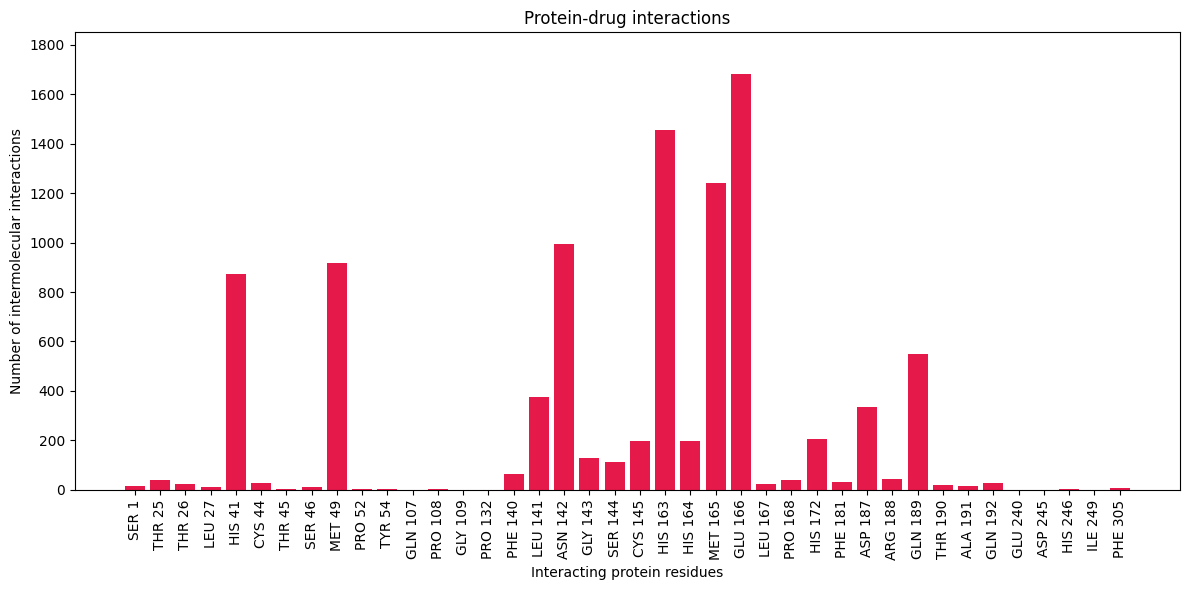

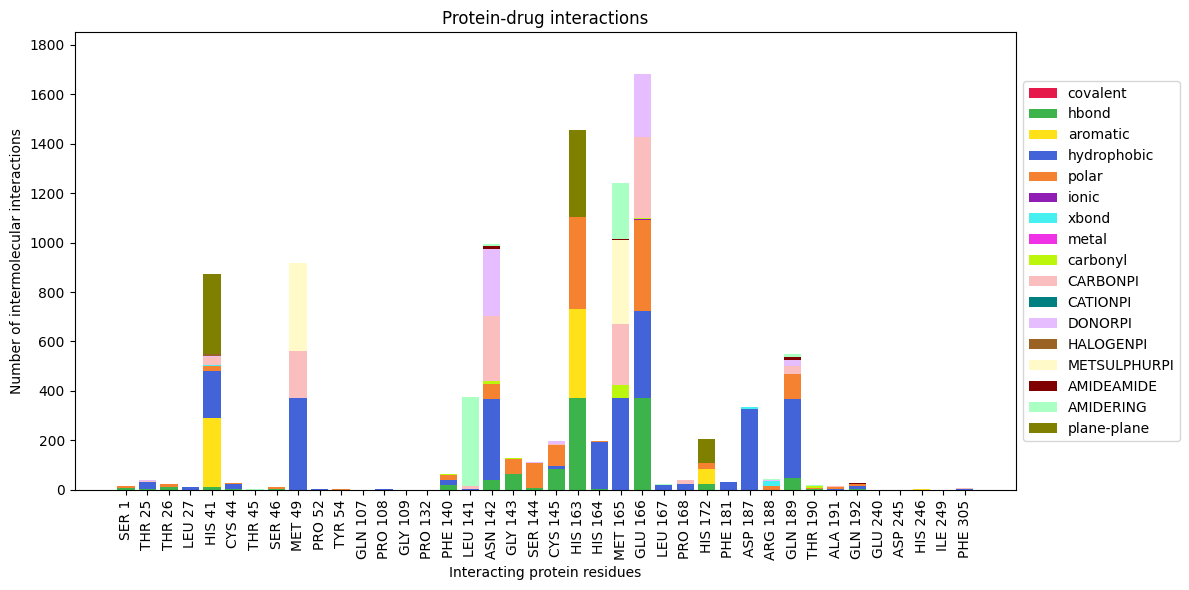

In [ ]:
analyzer.bar_chart(interaction_data=data, plot_name='test', axis=analyzer.ROWS, save=False)
analyzer.bar_chart(interaction_data=data, plot_name="test", axis=analyzer.ROWS, stacked=True, save=False)

### Pie Chart

Generates a **pie chart** summarizing interaction composition based on the specified axis.

```python
pie_chart(interaction_data: InteractionData, plot_name: str, axis: str, save: bool = False, colors: list[str] = None, type_count: bool = False, font: str = None) -> None
```

**Args**
- `interaction_data` (`InteractionData`): An object containing the processed interaction matrix and metadata.
- `plot_name` (`str`): The name of the plot (used as filename if saving).
- `axis` (`str`): Specifies what to analyze:
  - `'rows'`: Aggregates values across structures.
  - `'columns'`: Aggregates values across interaction types.
- `save` (`bool`, optional): If `True`, saves the chart instead of displaying it. Defaults to `False`.
- `colors` (`list[str]`, optional): List of colors to use for each slice.
- `type_count` (`bool`, optional): If `True`, shows count of interaction types instead of their values.
- `font` (`str`, optional): Font style for labels: `'upper'`, `'lower'`, or `None`.

> 💡 **Tip:** To avoid typos and improve code readability, you can use the predefined constants provided by the library:  
> - `analyzer.ROWS` instead of `'rows'`  
> - `analyzer.COLUMNS` instead of `'columns'`
> - `analyzer.UPPER` instead of `'upper'`  
> - `analyzer.LOWER` instead of `'lower'`

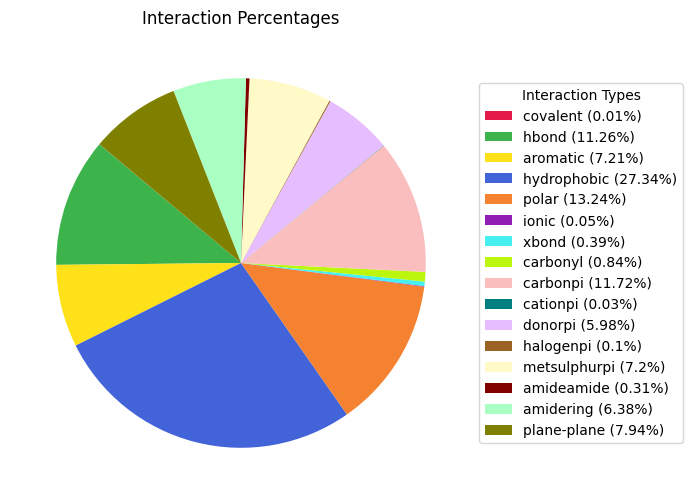

In [ ]:
analyzer.pie_chart(interaction_data=data, plot_name="test", axis=analyzer.ROWS, font=analyzer.LOWER, save=False)

### Heatmaps

Creates a **heatmap** based on the interaction matrix, using various aggregation strategies.

```python
heatmap(interaction_data: InteractionData, title: str, mode: str, x_label: str = "", y_label: str = "", min_v: int = None, max_v: int = None, font: str = None, save: bool = False) -> None
```

**Args**
- `interaction_data` (`InteractionData`): An object containing the processed interaction matrix and metadata.
- `title` (`str`): Title of the heatmap.
- `mode` (`str`): Determines how data is processed. Options include:
  - `'min'`: Minimum activity per interaction-residue pair.
  - `'max'`: Maximum activity per pair.
  - `'mean'`: Average activity value.
  - `'count'`: Number of occurrences for each interaction-residue pair.
  - `'percent'`: Same as `count`, but normalized to percentage.
- `x_label` (`str`, optional): Label for the x-axis. Defaults to `""`.
- `y_label` (`str`, optional): Label for the y-axis. Defaults to `""`.
- `min_v` (`int`, optional): Minimum value for the color scale. Defaults to auto-scaling.
- `max_v` (`int`, optional): Maximum value for the color scale. Defaults to auto-scaling.
- `font` (`str`, optional): Font style for labels: `'upper'`, `'lower'`, or `None`.
- `save` (`bool`, optional): If `True`, saves the heatmap as an image file. Defaults to `False`.

> 💡 **Tip:** To avoid typos and improve code readability, you can use the predefined constants provided by the library:  
> - `analyzer.MINIMUM` instead of `'min'`  
> - `analyzer.MAXIMUM` instead of `'max'`
> - `analyzer.MEAN` instead of `'mean'`
> - `analyzer.COUNT` instead of `'count'`
> - `analyzer.PERCENT` instead of `'percent'`
> - `analyzer.UPPER` instead of `'upper'`  
> - `analyzer.LOWER` instead of `'lower'`

---

**Mode Explanation**

| Mode     | Description                                                                 |
|----------|-----------------------------------------------------------------------------|
| `min`    | Displays the **lowest activity** value for each interaction-residue pair.   |
| `max`    | Shows the **highest activity** value for each interaction-residue pair.                                        |
| `mean`   | Computes the **average activity** value for each interaction-residue pair.                       |
| `count`  | Counts the **number of times** a interaction-residue pair appears.                              |
| `percent`| Converts `count` values to **percentage** based on row or column totals.    |

Generate a heatmap based on interaction data using different processing modes.
```python
def heatmap(self, interaction_data: InteractionData, title: str, mode: str, x_label: str = "", y_label: str = "", min_v: int = None, max_v: int = None, font: str = None, save: bool = False)
```
```python
Args:
    interaction_data (InteractionData): The object containing the interaction matrix.
    title (str): Title of the heatmap.
    mode (str): Processing mode ('min', 'max', 'mean', 'count', or 'percent').
    x_label (str, optional): Label for the x-axis. Defaults to an empty string.
    y_label (str, optional): Label for the y-axis. Defaults to an empty string.
    min_v (int, optional): Minimum value for the heatmap color scale. Defaults to None (auto-scaling).
    max_v (int, optional): Maximum value for the heatmap color scale. Defaults to None (auto-scaling).
    font (str, optional): Font style for the heatmap labels. Can be 'upper', 'lower', or None. Defaults to None.
    save (bool, optional): If True, saves the heatmap instead of displaying it. Defaults to False.
```
> 📝 **Note:** Activity Rounding
>
> For clarity in visualization, activity values in heatmaps (including cell values and the legend) are **rounded to one decimal place**. This may cause the same rounded value (e.g., 3.3) to appear multiple times in the legend if the original values are very close but distinct (e.g., 3.28 and 3.31).
>
> Keep in mind that this rounding is purely for display purposes—the underlying data retains full precision for analysis.

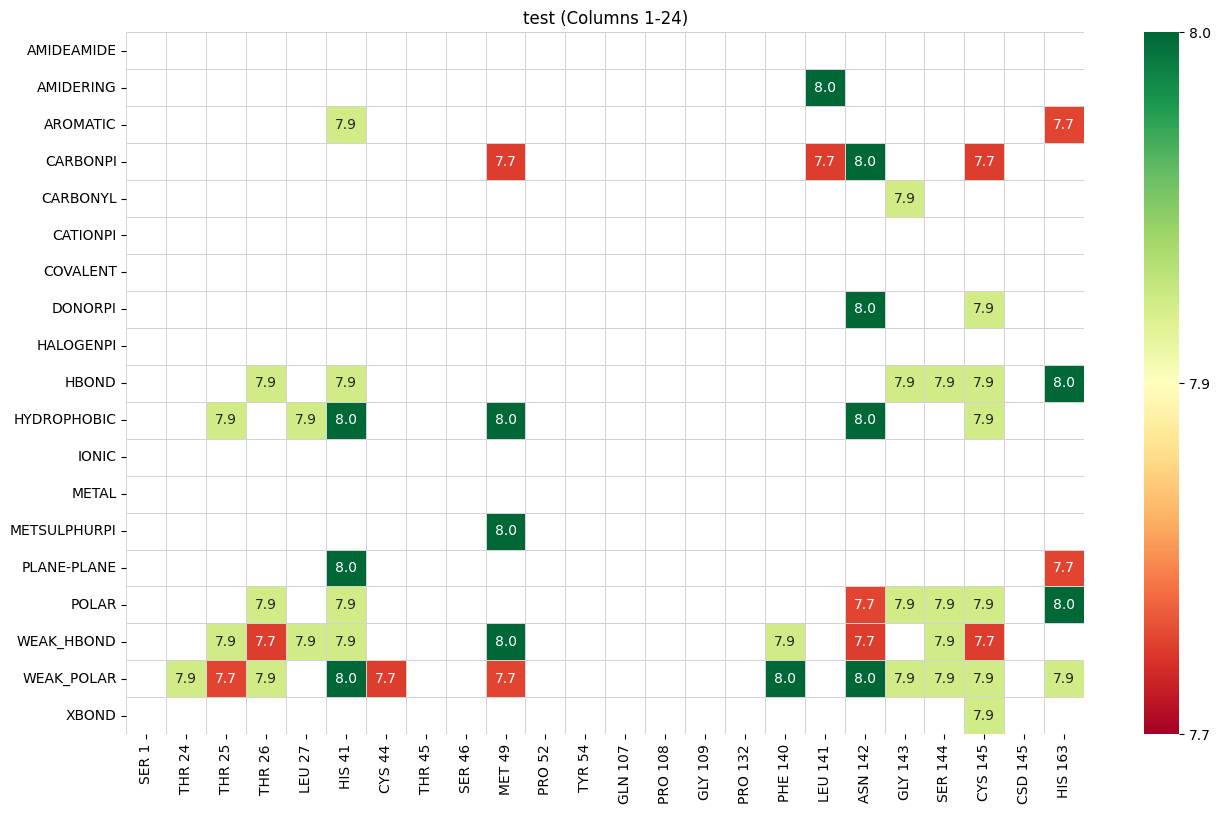

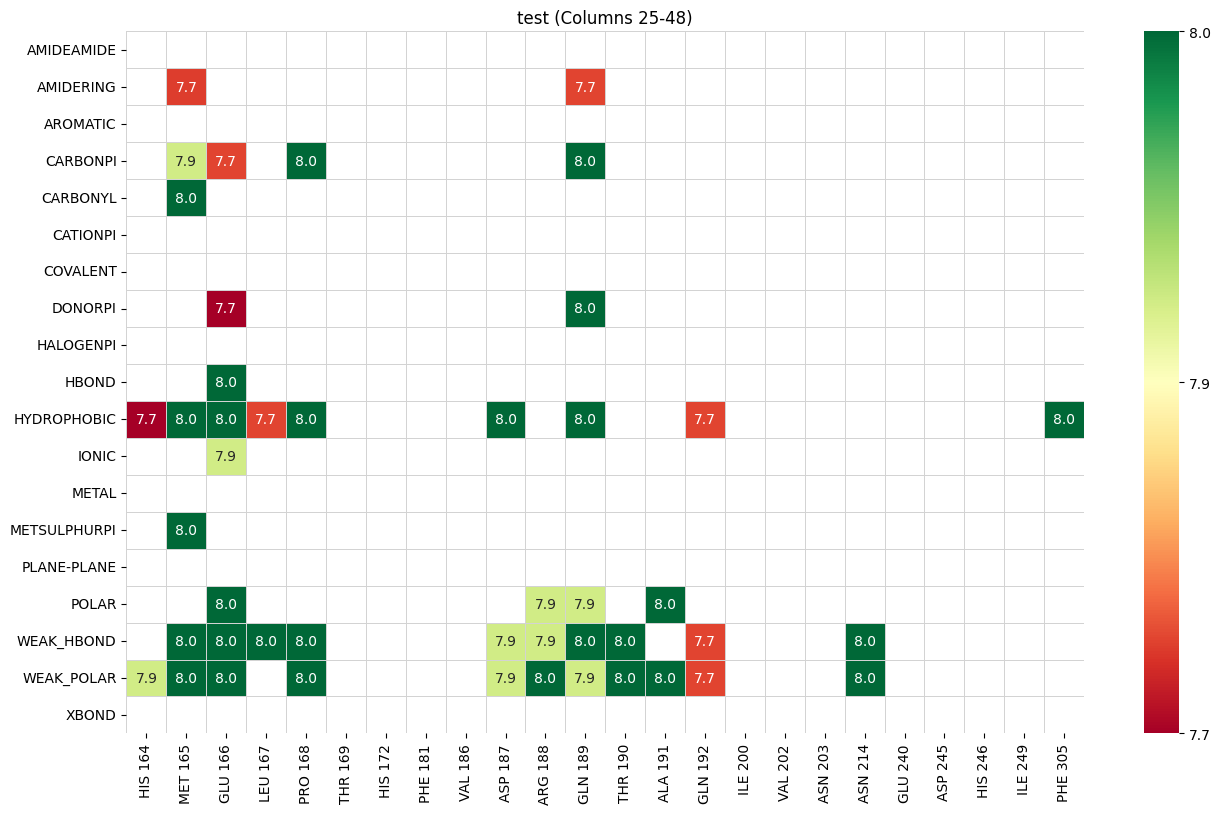

In [ ]:
analyzer.heatmap(interaction_data=data_sorted, title="test", mode=analyzer.MAXIMUM, font=analyzer.UPPER, save=False)